In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
base = pd.read_csv('Beijing_PM2.5_2010-2014.csv')
base.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


### Data Cleaning

In [3]:
# Deletion of records with unfilled values (missing values)
base = base.dropna()

In [4]:
base = base.drop('No', axis = 1)
base = base.drop('year', axis = 1)
base = base.drop('month', axis = 1)
base = base.drop('day', axis = 1)
base = base.drop('hour', axis = 1)
base = base.drop('cbwd', axis = 1)

In [5]:
base.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,129.0,-16,-4.0,1020.0,1.79,0,0
25,148.0,-15,-4.0,1020.0,2.68,0,0
26,159.0,-11,-5.0,1021.0,3.57,0,0
27,181.0,-7,-5.0,1022.0,5.36,1,0
28,138.0,-7,-5.0,1022.0,6.25,2,0


### Data preprocessing

In [6]:
# Predictive attributes are from index 1 to 6
base_trainingSet = base.iloc[:, 1:7].values
base_trainingSet

array([[ -16.  ,   -4.  , 1020.  ,    1.79,    0.  ,    0.  ],
       [ -15.  ,   -4.  , 1020.  ,    2.68,    0.  ,    0.  ],
       [ -11.  ,   -5.  , 1021.  ,    3.57,    0.  ,    0.  ],
       ...,
       [ -22.  ,   -3.  , 1034.  ,  242.7 ,    0.  ,    0.  ],
       [ -22.  ,   -4.  , 1034.  ,  246.72,    0.  ,    0.  ],
       [ -21.  ,   -3.  , 1034.  ,  249.85,    0.  ,    0.  ]])

In [7]:
# PM 2.5 levels, the target values are at index 0 of base
pm2_5_levels = base.iloc[:, 0].values
pm2_5_levels

array([129., 148., 159., ...,  10.,   8.,  12.])

### Applying Data Normalization

In [8]:
# Application of normalization
normalizer = MinMaxScaler(feature_range = (0, 1))
base_trainingSet_normalized = normalizer.fit_transform(base_trainingSet)
base_trainingSet_normalized

array([[0.35294118, 0.24590164, 0.52727273, 0.00237151, 0.        ,
        0.        ],
       [0.36764706, 0.24590164, 0.52727273, 0.00394662, 0.        ,
        0.        ],
       [0.42647059, 0.2295082 , 0.54545455, 0.00552173, 0.        ,
        0.        ],
       ...,
       [0.26470588, 0.26229508, 0.78181818, 0.42873071, 0.        ,
        0.        ],
       [0.26470588, 0.24590164, 0.78181818, 0.43584525, 0.        ,
        0.        ],
       [0.27941176, 0.26229508, 0.78181818, 0.44138468, 0.        ,
        0.        ]])

In [9]:
# Need to change the format of the variable to apply normalization
pm2_5_levels = pm2_5_levels.reshape(-1, 1)
pm2_5_levels_normalized = normalizer.fit_transform(pm2_5_levels)
pm2_5_levels_normalized

array([[0.12977867],
       [0.14889336],
       [0.15995976],
       ...,
       [0.01006036],
       [0.00804829],
       [0.01207243]])

In [11]:
previous = []
pm2_5_levels_real = []
for i in range(10, 41757):
    previous.append(base_trainingSet_normalized[i-10:i, 0:6])
    pm2_5_levels_real.append(pm2_5_levels_normalized[i, 0])
previous, pm2_5_levels_real = np.array(previous), np.array(pm2_5_levels_real)

In [12]:
print(previous)

[[[0.35294118 0.24590164 0.52727273 0.00237151 0.         0.        ]
  [0.36764706 0.24590164 0.52727273 0.00394662 0.         0.        ]
  [0.42647059 0.2295082  0.54545455 0.00552173 0.         0.        ]
  ...
  [0.48529412 0.2295082  0.6        0.0181757  0.         0.        ]
  [0.47058824 0.21311475 0.6        0.02134362 0.         0.        ]
  [0.48529412 0.2295082  0.61818182 0.02451154 0.         0.        ]]

 [[0.36764706 0.24590164 0.52727273 0.00394662 0.         0.        ]
  [0.42647059 0.2295082  0.54545455 0.00552173 0.         0.        ]
  [0.48529412 0.2295082  0.56363636 0.00868965 0.03703704 0.        ]
  ...
  [0.47058824 0.21311475 0.6        0.02134362 0.         0.        ]
  [0.48529412 0.2295082  0.61818182 0.02451154 0.         0.        ]
  [0.48529412 0.2295082  0.63636364 0.03005097 0.03703704 0.        ]]

 [[0.42647059 0.2295082  0.54545455 0.00552173 0.         0.        ]
  [0.48529412 0.2295082  0.56363636 0.00868965 0.03703704 0.        ]
  [0

In [13]:
print(pm2_5_levels_real)

[0.14084507 0.15291751 0.14889336 ... 0.01006036 0.00804829 0.01207243]


### Creation of neural network structure. 

In [15]:
LSTM_predictiveModel = Sequential()
LSTM_predictiveModel.add(LSTM(units = 100, return_sequences = True, input_shape = (previous.shape[1], 6)))  # The last parameter with the value 6 represents, the number of predictive attributes
LSTM_predictiveModel.add(Dropout(0.3))

LSTM_predictiveModel.add(LSTM(units = 50, return_sequences = True))
LSTM_predictiveModel.add(Dropout(0.2))

LSTM_predictiveModel.add(LSTM(units = 50, return_sequences = True))
LSTM_predictiveModel.add(Dropout(0.2))

LSTM_predictiveModel.add(LSTM(units = 50))
LSTM_predictiveModel.add(Dropout(0.2))

LSTM_predictiveModel.add(Dense(units = 1, activation = 'linear'))

LSTM_predictiveModel.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', 
                  metrics = ['mean_absolute_error'])
LSTM_predictiveModel.fit(previous, pm2_5_levels_real, epochs = 100, batch_size = 64)

Epoch 1/100
653/653 [==============================] - 13s 20ms/step - loss: 0.0073 - mean_absolute_error: 0.0617
Epoch 2/100
653/653 [==============================] - 13s 20ms/step - loss: 0.0061 - mean_absolute_error: 0.0556
Epoch 3/100
653/653 [==============================] - 13s 20ms/step - loss: 0.0057 - mean_absolute_error: 0.0532
Epoch 4/100
653/653 [==============================] - 13s 20ms/step - loss: 0.0055 - mean_absolute_error: 0.0523
Epoch 5/100
653/653 [==============================] - 13s 20ms/step - loss: 0.0054 - mean_absolute_error: 0.0514
Epoch 6/100
653/653 [==============================] - 13s 20ms/step - loss: 0.0053 - mean_absolute_error: 0.0510
Epoch 7/100
653/653 [==============================] - 13s 20ms/step - loss: 0.0052 - mean_absolute_error: 0.0504
Epoch 8/100
653/653 [==============================] - 13s 20ms/step - loss: 0.0052 - mean_absolute_error: 0.0503
Epoch 9/100
653/653 [==============================] - 13s 20ms/step - loss: 0.0051 - me

In [16]:
predicted_PM2_5 = LSTM_predictiveModel.predict(previous)
predicted_PM2_5 = normalizer.inverse_transform(predicted_PM2_5)
predicted_PM2_5

array([[115.56105 ],
       [106.06028 ],
       [ 99.69373 ],
       ...,
       [  9.209001],
       [  8.669482],
       [  8.602592]], dtype=float32)

In [32]:
print('predicted_PM2_5', predicted_PM2_5.mean())
print('pm2_5_levels', pm2_5_levels.mean())

predicted_PM2_5 91.397
pm2_5_levels 98.61321455085375


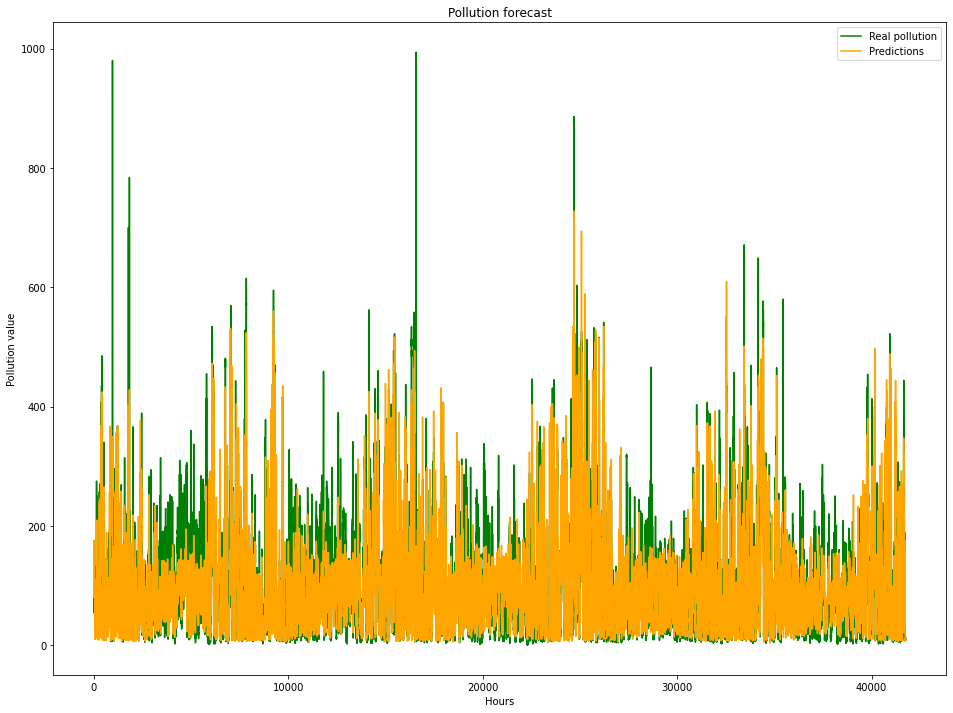

In [35]:
plt.figure(figsize=(16,12))
plt.plot(pm2_5_levels[10:], color = 'green', label = 'Real pollution')
plt.plot(predicted_PM2_5, color = 'orange', label = 'Predictions')
plt.title('Pollution forecast')
plt.xlabel('Hours')
plt.ylabel('Pollution value')
plt.legend()

In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(pm2_5_levels[10:], predicted_PM2_5))
print('MSE:', metrics.mean_squared_error(pm2_5_levels[10:], predicted_PM2_5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(pm2_5_levels[10:], predicted_PM2_5)))

MAE: 34.817538863944904
MSE: 2704.503759535272
RMSE: 52.00484361610245
